In [13]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [14]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [15]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])
df.head()

,A,B,C
2016-07-01 00:00:00,0.779524,0.127878,-0.223629
2016-07-01 00:00:01,1.256413,-0.218724,-0.461532
2016-07-01 00:00:02,-0.441112,-0.559946,-0.498154
2016-07-01 00:00:03,0.782369,0.020725,-0.891312
2016-07-01 00:00:04,0.017463,0.948598,0.718369


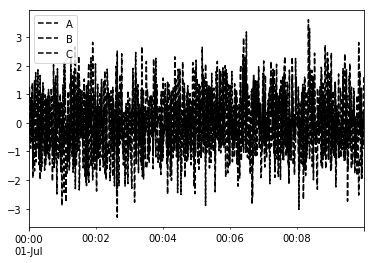

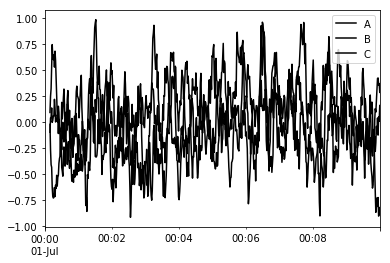

In [16]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [17]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

/Users/Jing/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  from ipykernel import kernelapp as app


,A,B,C
2016-07-01 00:00:01,1.033865,-0.056976,-0.350510
2016-07-01 00:00:02,0.475294,-0.247450,-0.406423
2016-07-01 00:00:03,0.568051,-0.166444,-0.552891
2016-07-01 00:00:04,0.426756,0.119704,-0.226653
2016-07-01 00:00:05,0.183524,0.006457,-0.048555
2016-07-01 00:00:06,0.285072,0.233118,0.249084
2016-07-01 00:00:07,-0.046989,-0.178927,0.255048
2016-07-01 00:00:08,-0.100679,-0.261921,0.122092
2016-07-01 00:00:09,-0.229810,-0.128245,0.187676


In [18]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [19]:
df.head()

,A,B,C,D
2016-06-06,-0.917753,-1.179482,1.371661,0.274029
2016-06-07,-0.317610,0.007471,-0.707495,0.405755
2016-06-08,0.852964,-0.286485,-0.671572,0.480859
2016-06-09,0.298605,0.741983,-0.125840,0.083906
2016-06-10,0.418771,0.162902,1.783730,-0.598188


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c52db70>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11c94a908>], dtype=object)

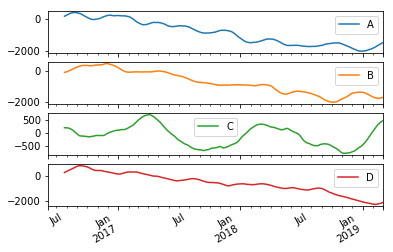

In [20]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [21]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,0.886598,0.377331,1.468000,0.610771


In [22]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,-1.076558,-1.175746,1.017913,0.476907
2016-06-08,-0.845172,-1.269996,0.676140,0.704819
2016-06-09,-0.654827,-1.131626,0.473793,0.839752
2016-06-10,-0.456866,-1.016023,0.709131,0.801074


In [23]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?

In [24]:
# EWMA
# Why use EWMA?

In [25]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [26]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting